In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score, f1_score,
    recall_score, precision_score, roc_auc_score, roc_curve,
    precision_recall_curve, average_precision_score
    )
from sklearn.model_selection import KFold
from sklearn.metrics import (mean_absolute_error, mean_squared_error, r2_score)
import math # Import math
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving DhakaDailyP.csv to DhakaDailyP.csv


In [ ]:
data = pd.read_csv("DhakaDailyP.csv")
data.shape

(3697, 18)

In [ ]:
data

,Date,TempMax,TempMin,TempMean,RelHumMax,RelHumMin,RelHumMean,WindGustMax,WindGustMin,WindGustMean,WindSpeedMax,WindSpeedMin,WindSpeedMean,SunShDurMin,ShWaveRad,UVRad,Evapotranspiration,zone
0,1,25.600426,12.240426,18.155424,94.579930,50.815685,79.600460,6.2,3.1,4.204167,2.707397,1.552418,2.151222,643.38180,4382,466.08000,1.929600,1
1,2,23.050425,11.370426,16.619590,97.318700,47.404877,76.390050,6.7,3.2,4.470833,2.780288,1.676306,2.273954,639.53937,4540,469.00003,2.210400,1
2,3,23.050425,11.590426,15.811260,97.971664,51.919422,82.926390,6.5,2.7,4.304167,2.402082,1.697056,2.066819,632.07730,4516,469.73000,1.902240,1
3,4,22.810425,11.910426,15.826259,97.267784,56.197530,84.282970,5.4,2.2,3.791667,2.549510,1.300000,1.926554,505.73710,4358,465.78998,1.870560,1
4,5,21.390425,12.350426,16.073760,99.875690,63.875580,87.653720,4.6,1.9,3.154166,2.080865,0.424264,1.458186,127.57086,2380,261.61002,1.018080,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3692,3693,27.870424,14.410426,19.789177,93.989080,36.841496,74.684410,5.3,2.9,4.004167,2.700000,1.456022,2.053184,668.63340,5411,578.44000,2.818080,1
3693,3694,28.230425,13.930426,20.120424,95.306335,32.459953,71.647310,5.3,1.6,3.450000,2.801785,1.000000,2.003868,623.37006,5389,585.98000,2.894400,2
3694,3695,28.470425,14.100426,21.511260,98.356926,33.007755,67.256160,5.1,1.2,3.220834,2.473863,0.583095,1.757366,546.60020,5310,582.47003,2.975040,2
3695,3696,28.570425,16.110424,21.699175,96.244020,39.720676,74.035576,4.6,2.0,3.229166,2.102380,0.943398,1.531127,497.14750,4800,552.63000,2.610720,2


In [ ]:
# 1. Load & Clean Data
X = data.drop(columns=['TempMean', 'zone'])
y = data['TempMean']

# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 3. Pipeline + GridSearch
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(random_state=42))
    ])

param_grid = {
        'rf__n_estimators': [100, 200],
        'rf__max_depth': [None, 10, 20],
        'rf__min_samples_split': [2, 5]
    }

grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        cv=KFold(n_splits=5, shuffle=True, random_state=42),
        scoring='neg_mean_squared_error', # Use a regression scoring metric
        n_jobs=-1,
        verbose=0
    )


In [ ]:
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# 4. Final Evaluation on Test Set
y_test_pred = best_model.predict(X_test)

# Use regression metrics
mse = mean_squared_error(y_test, y_test_pred)
rmse = math.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

print('Mean absolute error = ' + str(mean_absolute_error(y_test, y_test_pred)))
print('Mean squared error  = ' + str(mse))
print('Root mean square error = ' + str(rmse))
print('R2 score            = ' + str(r2))

Mean absolute error = 0.2924132345418916
Mean squared error  = 0.1564977129341617
Root mean square error = 0.3955979182631801
R2 score            = 0.9923557697078563


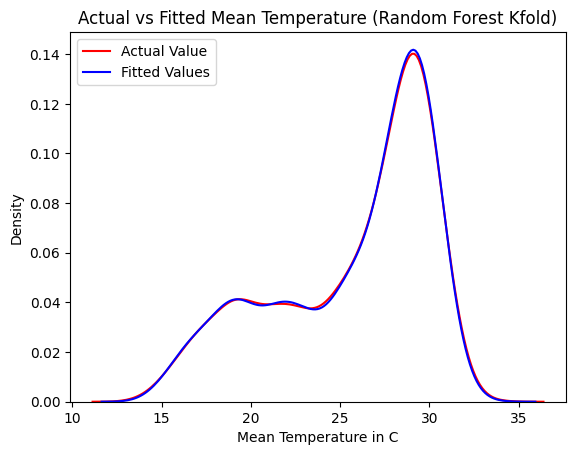

In [ ]:
y_pred = best_model.predict(X)
ax1 = sns.kdeplot(y, color="r", label="Actual Value")
sns.kdeplot(y_pred, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Mean Temperature (Random Forest Kfold)')
plt.xlabel('Mean Temperature in C')
plt.ylabel('Density')
plt.legend()
plt.show()
plt.close()

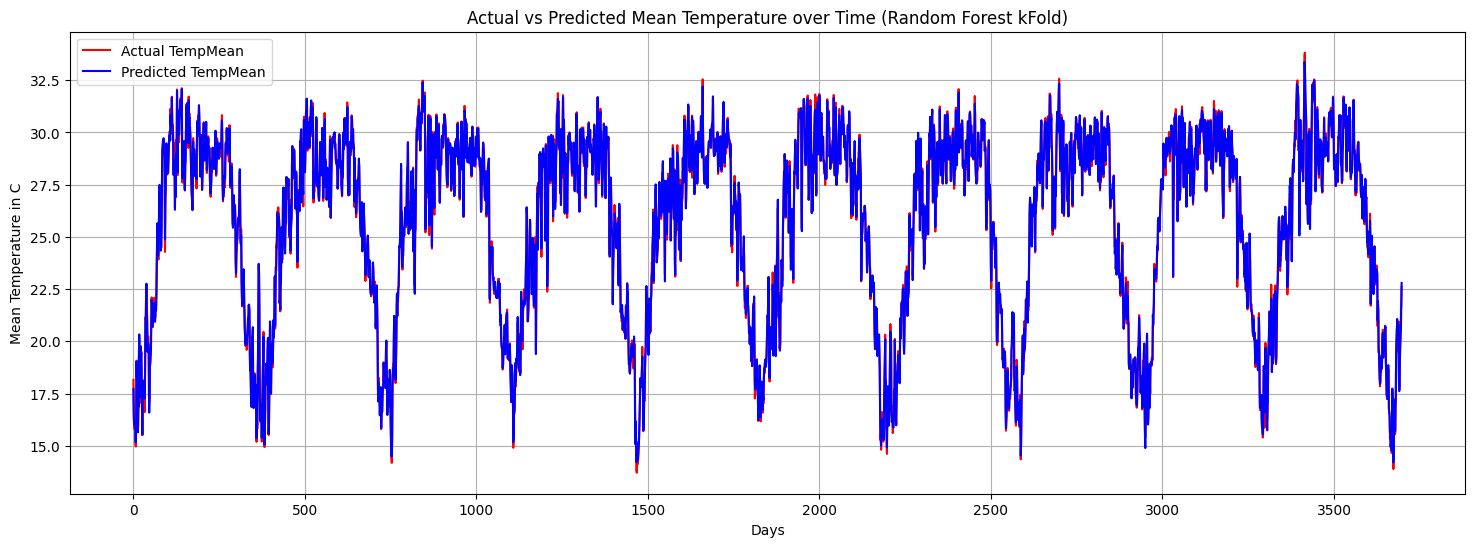

In [ ]:
# Plot actual vs predicted values for the test set
plt.figure(figsize=(18, 6))
plt.plot(data['Date'], y, label='Actual TempMean', color='red')
plt.plot(data['Date'], y_pred, label='Predicted TempMean', color='blue')
plt.xlabel('Days')
plt.ylabel('Mean Temperature in C')
plt.title('Actual vs Predicted Mean Temperature over Time (Random Forest kFold)')
plt.legend()
plt.grid(True)
plt.show()

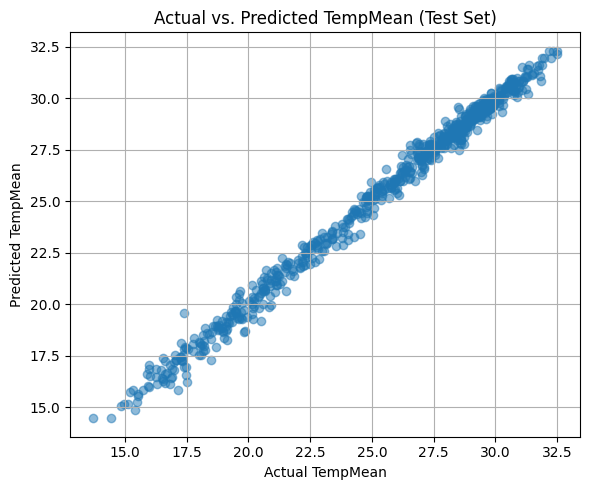

In [ ]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.xlabel("Actual TempMean")
plt.ylabel("Predicted TempMean")
plt.title("Actual vs. Predicted TempMean (Test Set)")
plt.grid(True)
plt.tight_layout()
plt.show()

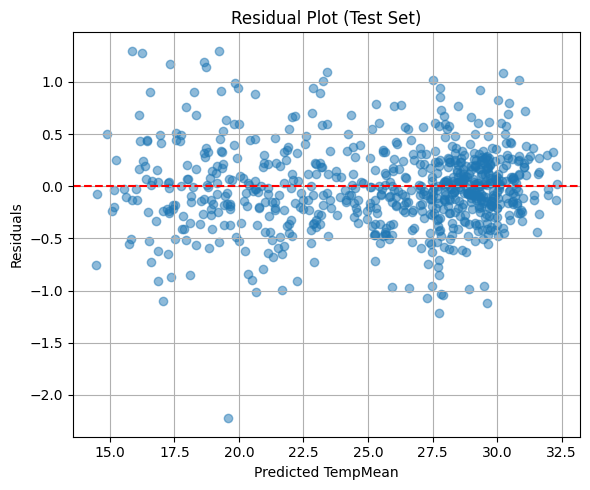

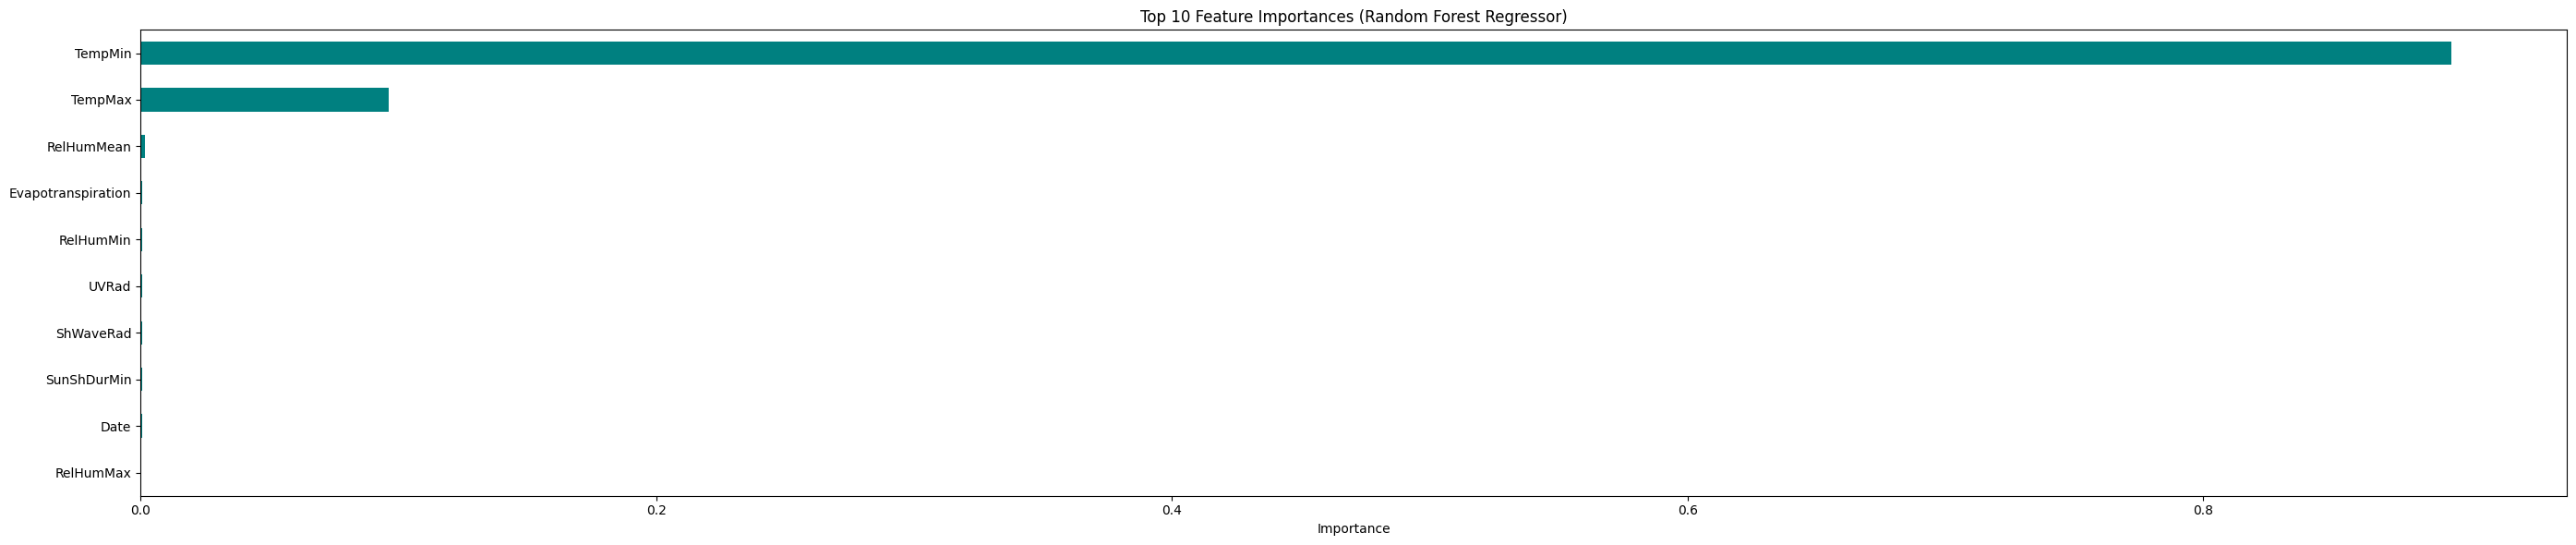


--- Top 20 Features ---
                    Importance
TempMin               0.896225
TempMax               0.096310
RelHumMean            0.001602
Evapotranspiration    0.000718
RelHumMin             0.000605
UVRad                 0.000599
ShWaveRad             0.000522
SunShDurMin           0.000490
Date                  0.000476
RelHumMax             0.000447
WindSpeedMax          0.000425
WindGustMax           0.000350
WindGustMin           0.000339
WindSpeedMin          0.000328
WindSpeedMean         0.000285
WindGustMean          0.000279


,Metric,Value
0,Mean Squared Error (MSE),0.156498
1,Root Mean Squared Error (RMSE),0.395598
2,R-squared (R2),0.992356


In [ ]:
# Residual Plot
residuals = y_test - y_test_pred
plt.figure(figsize=(6, 5))
plt.scatter(y_test_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted TempMean")
plt.ylabel("Residuals")
plt.title("Residual Plot (Test Set)")
plt.grid(True)
plt.tight_layout()
plt.show()


# 6. Feature Importance
rf_model = best_model.named_steps['rf']
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

# Plot Top 20 Features
plt.figure(figsize=(28, 6))
importances.head(10).plot(kind='barh', color='teal')
plt.title("Top 10 Feature Importances (Random Forest Regressor)")
plt.xlabel("Importance")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Print top features as table
print("\n--- Top 20 Features ---")
print(importances.head(20).to_frame(name="Importance"))


# 7. Final Summary DataFrame
summary = pd.DataFrame({
        "Metric": [
            "Mean Squared Error (MSE)",
            "Root Mean Squared Error (RMSE)",
            "R-squared (R2)"
        ],
        "Value": [
            mse,
            rmse,
            r2
        ]
    })

display(summary)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving DhakaDaily.csv to DhakaDaily.csv


In [ ]:
# Load the dataset
df = pd.read_csv("DhakaDaily.csv")
df.head()

,Date,TempMax,TempMin,TempMean,RelHumMax,RelHumMin,RelHumMean,WindGustMax,WindGustMin,WindGustMean,WindSpeedMax,WindSpeedMin,WindSpeedMean,SunShDurMin,ShWaveRad,UVRad,Evapotranspiration,zone
0,2014-01-02T00:00:00,25.600426,12.240426,18.155424,94.579930,50.815685,79.60046,6.2,3.1,4.204167,2.707397,1.552418,2.151222,643.38180,4382,466.08000,1.92960,NaN
1,2014-01-03T00:00:00,23.050425,11.370426,16.619590,97.318700,47.404877,76.39005,6.7,3.2,4.470833,2.780288,1.676306,2.273954,639.53937,4540,469.00003,2.21040,NaN
2,2014-01-04T00:00:00,23.050425,11.590426,15.811260,97.971664,51.919422,82.92639,6.5,2.7,4.304167,2.402082,1.697056,2.066819,632.07730,4516,469.73000,1.90224,NaN
3,2014-01-05T00:00:00,22.810425,11.910426,15.826259,97.267784,56.197530,84.28297,5.4,2.2,3.791667,2.549510,1.300000,1.926554,505.73710,4358,465.78998,1.87056,NaN
4,2014-01-06T00:00:00,21.390425,12.350426,16.073760,99.875690,63.875580,87.65372,4.6,1.9,3.154166,2.080865,0.424264,1.458186,127.57086,2380,261.61002,1.01808,NaN


In [ ]:
# Convert 'Date' to datetime objects to extract time-based features
df['Date'] = pd.to_datetime(df['Date'])

# Extract time-based features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['DayOfYear'] = df['Date'].dt.dayofyear


# Features and target
XP = df[['Year', 'Month', 'DayOfWeek', 'DayOfYear']].copy() # Use the new time-based features
y = df['TempMean'].copy()

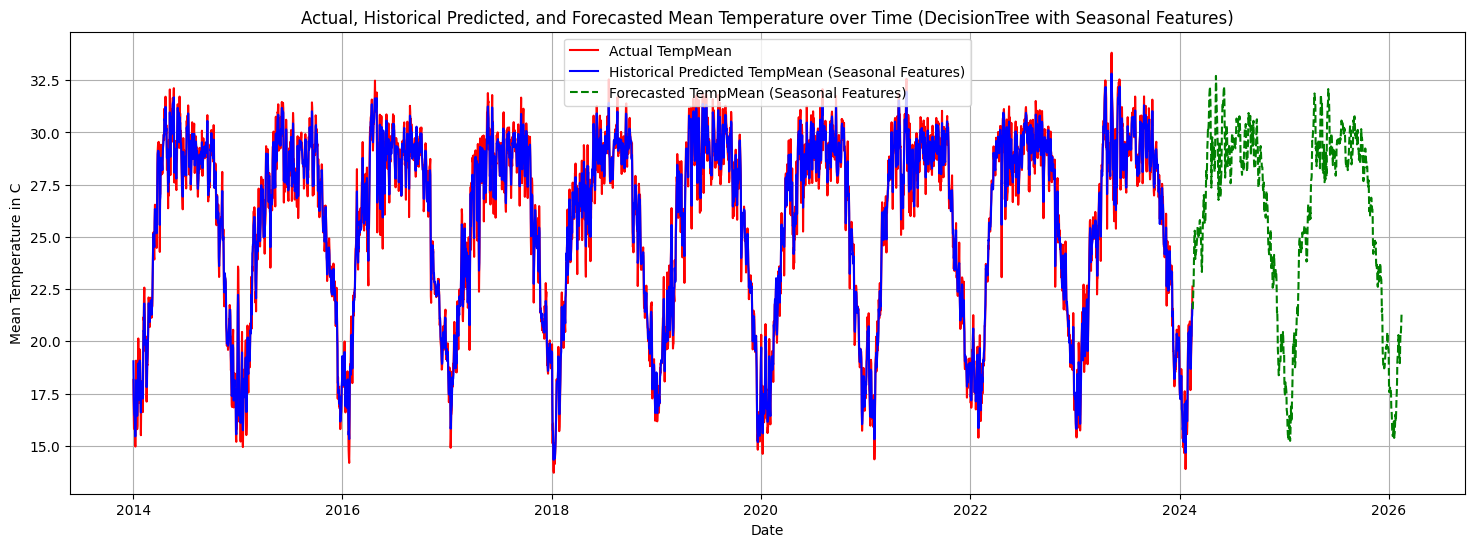

In [ ]:
best_model.fit(XP, y)

# Make predictions on the training data for plotting
y_pred_historical = best_model.predict(XP)

# --- Forecast for the next 2 years ---
# Create future dates for the next 2 years (assuming daily data)
last_date_dt = df['Date'].max()
future_dates_dt = pd.date_range(start=last_date_dt + pd.Timedelta(days=1), periods=365*2, freq='D')

# Create a DataFrame for future dates and extract time-based features
future_df = pd.DataFrame({'Date': future_dates_dt})
future_df['Year'] = future_df['Date'].dt.year
future_df['Month'] = future_df['Date'].dt.month
future_df['DayOfWeek'] = future_df['Date'].dt.dayofweek
future_df['DayOfYear'] = future_df['Date'].dt.dayofyear


# Preprocess future dates using the same imputer and scaler fitted on historical data
future_X = future_df[['Year', 'Month', 'DayOfWeek', 'DayOfYear']].copy()

# Make predictions for the future dates
future_predictions = best_model.predict(future_X)

# Create a DataFrame for the forecasted data
forecast_df_seasonal = pd.DataFrame({'Date': future_dates_dt, 'Predicted TempMean': future_predictions})

# Plot historical data, historical predictions, and forecasted data
plt.figure(figsize=(18, 6))
plt.plot(df['Date'], y, label='Actual TempMean', color='red')
plt.plot(df['Date'], y_pred_historical, label='Historical Predicted TempMean (Seasonal Features)', color='blue')
plt.plot(forecast_df_seasonal['Date'], forecast_df_seasonal['Predicted TempMean'], label='Forecasted TempMean (Seasonal Features)', color='green', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Mean Temperature in C')
plt.title('Actual, Historical Predicted, and Forecasted Mean Temperature over Time (DecisionTree with Seasonal Features)')
plt.legend()
plt.grid(True)
plt.show()